**Prediction of monthly Henry Hub natural gas spot prices using 4 machine learning algorithms; Support Vector Machines, Random Forest Regression, Gradient Boosting Machine and Artificial Neural Networks**

The Henry Hub natural gas price is an important benchmark in the natural gas industry because it is based on the supply and demand of natural gas as an independent commodity unlike other hub prices that create a pricing system considering natural gas as a product of oil and thus indexing its price to oil. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

The data was gathered independently from the EIA website for the period between January 2001 and November 2021.
The features considered were:
* Cooling Degree Days
* Heating Degree Days
* Natural Gas Demand
* Natural Gas Imports
* Natural Gas Exports
* Natural Gas Drilling Rigs Count 
* Natural Gas Supply
* Natural Gas Storage
* West Texas Intermediate (WTI) oil price
* Heating oil price 
* USD/EUR exchange rate 


In [2]:
df=pd.read_csv('natural_gas_data.csv')
df.head()

,month,cool_days,hot_days,demand,imports,exports,rig_count,supply,storage,wti_price,heating_oil,usd_rate,gas_price
0,2001-01,4.0,928.0,2676998.0,373077.0,25547.0,879.0,1753237.0,5609446.0,29.59,0.845,1.065594,8.17
1,2001-02,14.0,720.0,2309464.0,328289.0,26882.0,898.0,1582557.0,5240820.0,29.61,0.785,1.085974,5.61
2,2001-03,13.0,663.0,2246633.0,358103.0,32121.0,913.0,1766754.0,5041971.0,27.25,0.741,1.100009,5.23
3,2001-04,40.0,311.0,1807170.0,318573.0,23637.0,957.0,1703310.0,5252851.0,27.49,0.782,1.121112,5.19
4,2001-05,117.0,124.0,1522382.0,321878.0,28981.0,997.0,1763141.0,5749464.0,28.63,0.772,1.141182,4.19


__EXPLORATORY DATA ANALYSIS AND DATA CLEANING__

The dataset contains 251 samples alongside 11 features. 

In [3]:
df.shape

(251, 13)

In [4]:
df.describe()

,cool_days,hot_days,demand,imports,exports,rig_count,supply,storage,wti_price,heating_oil,usd_rate,gas_price
count,251.000000,251.000000,2.510000e+02,251.000000,251.000000,251.000000,2.510000e+02,2.510000e+02,251.000000,251.000000,251.000000,251.000000
mean,116.840637,351.892430,2.114223e+06,288789.003984,163093.075697,667.804781,2.118770e+06,6.908174e+06,62.443227,1.833048,0.833984,4.436892
std,123.940173,310.865425,4.608949e+05,58537.633529,140154.507369,470.567366,4.984372e+05,8.043990e+05,25.281008,0.761938,0.111220,2.182965
min,3.000000,3.000000,1.368369e+06,174225.000000,23637.000000,70.000000,1.400941e+06,5.041971e+06,16.550000,0.524000,0.634241,1.630000
25%,15.000000,39.500000,1.742105e+06,238303.500000,63901.500000,190.500000,1.692639e+06,6.288917e+06,43.900000,1.304000,0.754329,2.850000
50%,52.000000,284.000000,2.067048e+06,282159.000000,117329.000000,704.000000,1.984174e+06,7.004573e+06,59.270000,1.804000,0.821033,3.840000
75%,220.500000,629.000000,2.400512e+06,334006.500000,198450.500000,989.500000,2.417350e+06,7.543381e+06,81.340000,2.251000,0.891302,5.660000
max,404.000000,969.000000,3.424302e+06,426534.000000,595411.000000,1585.000000,3.234746e+06,8.384087e+06,133.880000,3.801000,1.171584,13.420000


In [5]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


cool_days      0.882533
hot_days       0.402952
demand         0.631137
imports        0.161730
exports        1.502598
rig_count      0.298495
supply         0.747028
storage       -0.229896
wti_price      0.363692
heating_oil    0.318235
usd_rate       0.981133
gas_price      1.481865
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        251 non-null    object 
 1   cool_days    251 non-null    float64
 2   hot_days     251 non-null    float64
 3   demand       251 non-null    float64
 4   imports      251 non-null    float64
 5   exports      251 non-null    float64
 6   rig_count    251 non-null    float64
 7   supply       251 non-null    float64
 8   storage      251 non-null    float64
 9   wti_price    251 non-null    float64
 10  heating_oil  251 non-null    float64
 11  usd_rate     251 non-null    float64
 12  gas_price    251 non-null    float64
dtypes: float64(12), object(1)
memory usage: 25.6+ KB


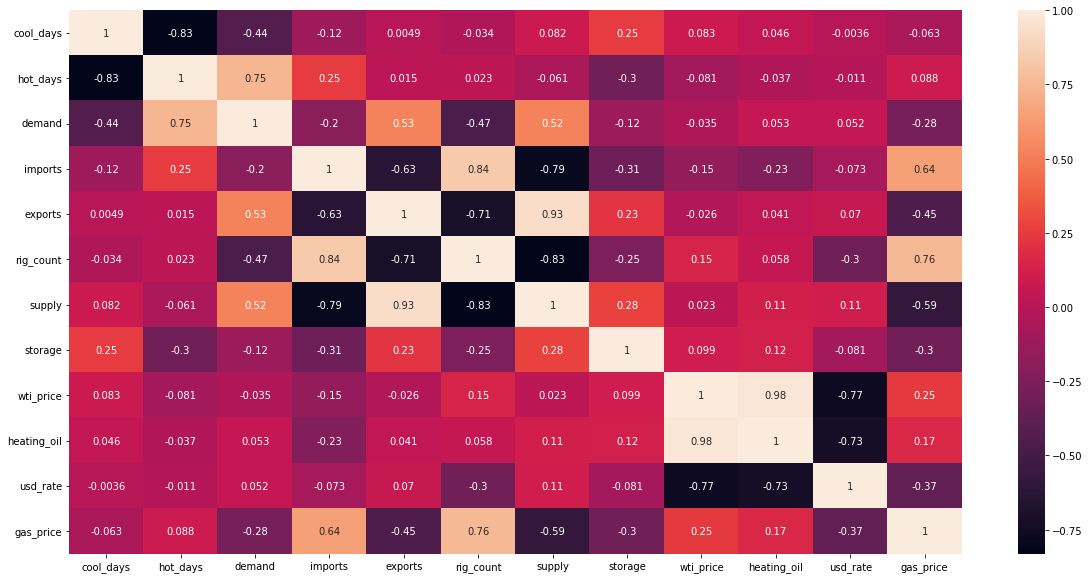

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Write a function that automatically creates line graphs of two selected features in the dataframe

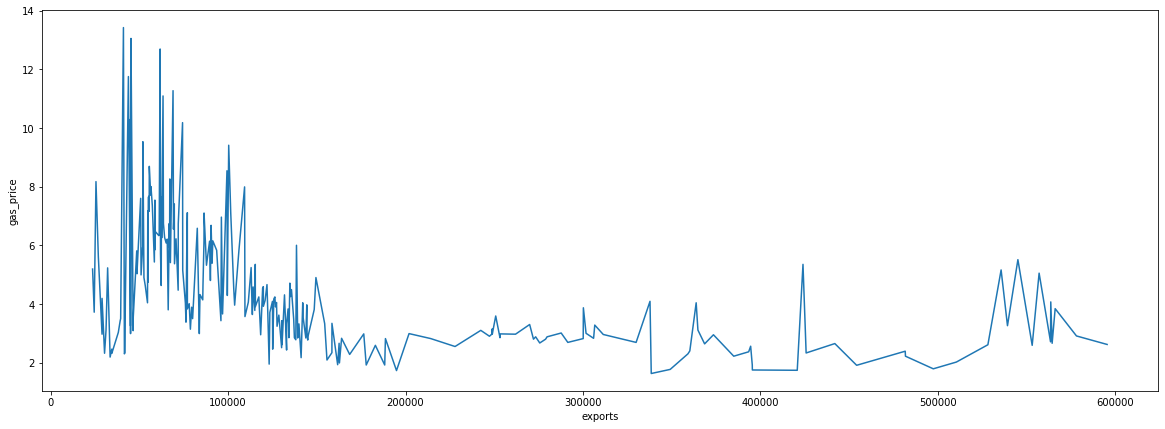

In [8]:
def graph(a,b):
    plt.figure(figsize=(20,7))
    sns.lineplot(x=a, y=b)
    plt.show()

graph(df['exports'], df['gas_price'])

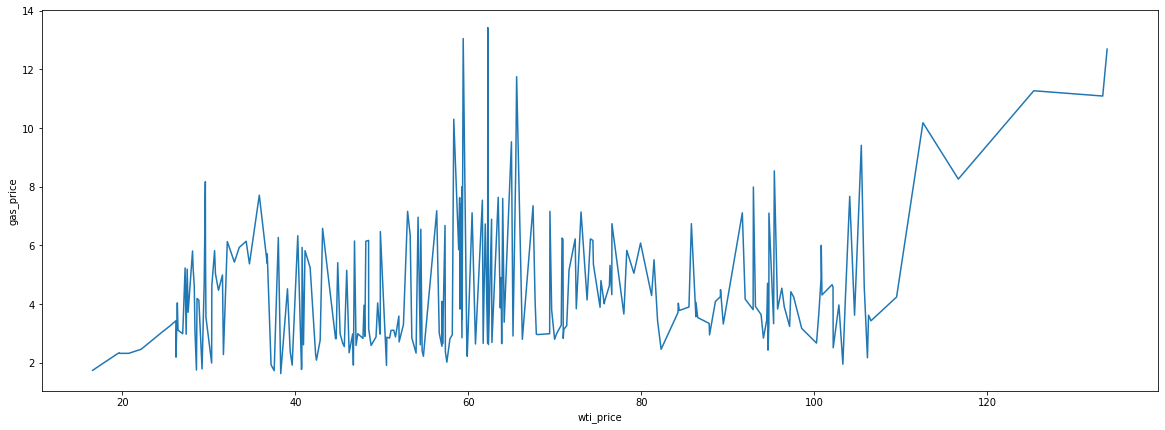

In [158]:
graph(df['wti_price'], df['gas_price'])

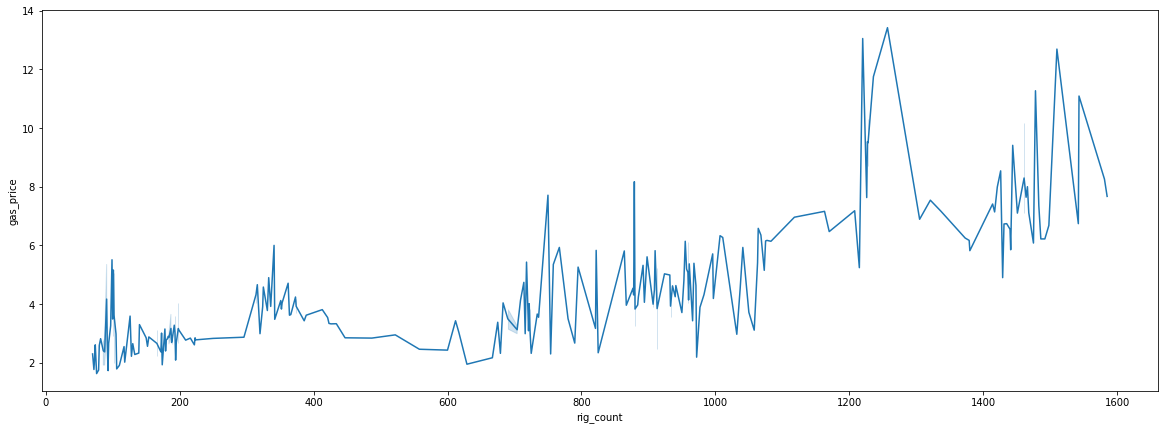

In [20]:
graph(df['rig_count'], df['gas_price'])

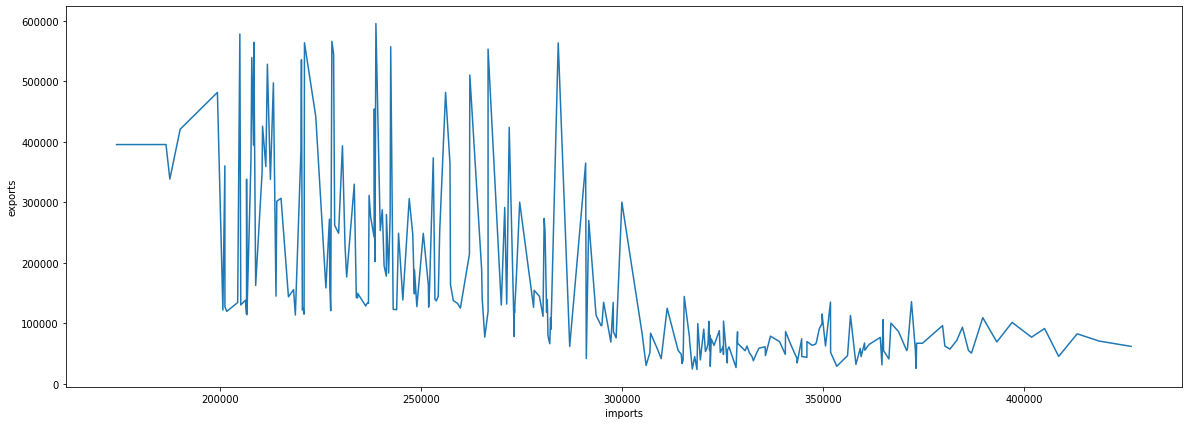

In [159]:
graph(df['imports'], df['exports'])

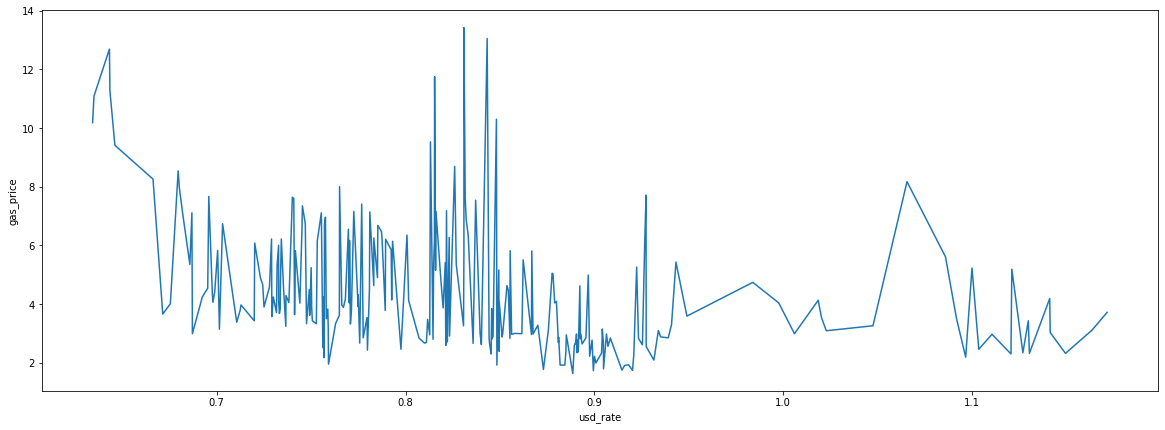

In [160]:
graph(df['usd_rate'], df['gas_price'])

__MODEL BUILDING__

Write a function that returns predictions for each value which can be used for each model.

In [31]:
def get_preds(y_test, y_preds):
    y_test=pd.DataFrame(y_test)
    y_test.rename(columns={0:'Actual'}, inplace=True)
    y_preds=pd.DataFrame(y_preds)
    y_preds.rename(columns={0:'Predicted'}, inplace=True)
    predictions=pd.concat([y_test, y_preds], axis=1)
    return predictions
     


In [10]:
X=df.iloc[:, 1:-1].values
y=df.iloc[:, -1].values

In [48]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

__Support Vector Regression__


Feature scaling is necessary for optimal performance of the SVR algorithm. Standardization is thus implemented on the dataset as a feature scaling technique.

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

Make a copy of the preexisting dataframe by using the .copy() method

In [13]:
df1=df.copy()

In [14]:
df1.head()

,month,cool_days,hot_days,demand,imports,exports,rig_count,supply,storage,wti_price,heating_oil,usd_rate,gas_price
0,2001-01,4.0,928.0,2676998.0,373077.0,25547.0,879.0,1753237.0,5609446.0,29.59,0.845,1.065594,8.17
1,2001-02,14.0,720.0,2309464.0,328289.0,26882.0,898.0,1582557.0,5240820.0,29.61,0.785,1.085974,5.61
2,2001-03,13.0,663.0,2246633.0,358103.0,32121.0,913.0,1766754.0,5041971.0,27.25,0.741,1.100009,5.23
3,2001-04,40.0,311.0,1807170.0,318573.0,23637.0,957.0,1703310.0,5252851.0,27.49,0.782,1.121112,5.19
4,2001-05,117.0,124.0,1522382.0,321878.0,28981.0,997.0,1763141.0,5749464.0,28.63,0.772,1.141182,4.19


In [144]:
X1=df1.iloc[:, 1:-1].values
y1=df1.iloc[:, -1].values.reshape(-1,1)
X_train1, X_test1, y_train1, y_test1= train_test_split(X1, y1, test_size=0.2, random_state=42)
sc=StandardScaler()
X_train1=sc.fit_transform(X_train1)
X_test1=sc.transform(X_test1)
sc_y=StandardScaler()
y_train1=sc_y.fit_transform(y_train1)
y_test1=sc_y.transform(y_test1)





Hyperparameter tuning is an important step in model building in order to fully maximize the model's prediction abilities. We will be making use of the Grid Search Cross Validation technique for this cause. 

In [16]:
reg_sv=SVR()
p_grid={'C':[ 1000, 10000,100000], 'kernel':['rbf', 'poly']}
search=GridSearchCV(estimator=reg_sv, param_grid=p_grid)
search.fit(X_train1, y_train1.ravel())
sv_preds=search.best_estimator_
y_preds=sv_preds.predict(X_test1)
print('The RMSE score for the SVR model is', np.sqrt(mean_squared_error(y_test1, y_preds)))



The RMSE score for the SVR model is 0.3824840968344997


Use a 10-fold cross validation technique for model validation. A decision to run the process 30 times was taken to further study the RMSE value in as many random cases as possible. 

In [17]:
for i in range(30):
  outer_cv=KFold(n_splits=10, shuffle= True)
  scores = cross_val_score(sv_preds, X_train1, y_train1.ravel(), scoring='neg_root_mean_squared_error', cv=outer_cv)
  print(np.mean(scores))

-0.38243451859616345
-0.40509101868398495
-0.350317206831854
-0.3973550041003397
-0.3603995727315042
-0.35041612278746687
-0.3948785829860342
-0.36552622726166206
-0.3707524988209293
-0.392455772703256
-0.40983888551523345
-0.3628906331238545
-0.3600044040239342
-0.39097786294814785
-0.3643754560133593
-0.3713692550304593
-0.36336217232890444
-0.3702443043599001
-0.3841980184371805
-0.3862681546297513
-0.3643816397326459
-0.3730239132380471
-0.373653839765291
-0.38682338344929806
-0.370144115908464
-0.37968993186334465
-0.37281036646422105
-0.4332349492567696
-0.3778660388469087
-0.38604736279663665


In [36]:
y_test2 = sc_y.inverse_transform(y_test1)
pre1 = sc_y.inverse_transform(y_preds.reshape(-1,1))
svr_predictions=get_preds(y_test2, pre1)
svr_predictions


,Actual,Predicted
0,4.24,3.462038
1,3.11,2.866313
2,3.92,3.807978
3,8.69,7.909211
4,4.80,5.066917
5,1.73,1.764678
6,2.98,2.964551
7,5.16,4.231195
8,2.46,2.342300
9,3.71,3.957812


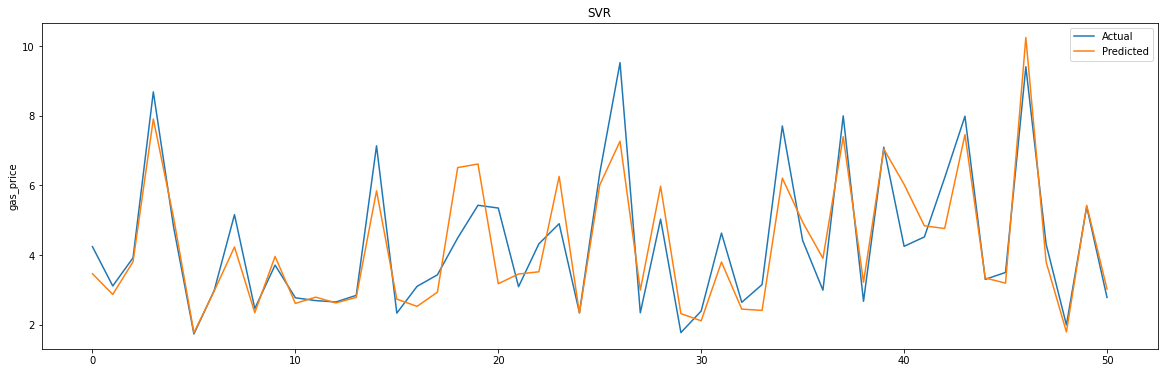

In [161]:
plt.figure(figsize=(20,6))
plt.plot(svr_predictions['Actual'])
plt.plot(svr_predictions['Predicted'])
plt.ylabel('gas_price')
plt.legend(['Actual', 'Predicted'], loc='best')
plt.title('SVR')
plt.show()

__Random Forest Regressor__

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
print('The RMSE score for the RFR model is', np.sqrt(mean_squared_error(y_test, y_pred)))

The RMSE score for the RFR model is 0.8583886910380183


In [23]:
  for i in range(30):
    outer_cv=KFold(n_splits=10, shuffle= True)
    scores = cross_val_score(rf, X, y, scoring='neg_root_mean_squared_error', cv=outer_cv)
    print(np.mean(scores))

-0.8706765547211622
-0.8520472069328321
-0.8674147491022837
-0.8692423368767856
-0.8330875444260826
-0.8461092754173556
-0.8110950146564452
-0.9593094128252915
-0.9100032913947468
-0.8711628534547102
-0.8724053316736505
-0.8343878008425311
-0.8585130269130217
-0.8194350154823752
-0.8087943487635879
-0.8730593913285004
-0.8642503126802552
-0.8627290569444884
-0.8248277680976672
-0.9117927418022853
-0.8516242887020864
-0.842326834048715
-0.8389748031550452
-0.8652397042620074
-0.8807110070714697
-0.8608975502417413
-0.8373927103827212
-0.897291795818951
-0.8736661725129847
-0.8951126242888728


In [37]:
rf_predictions=get_preds(y_test, y_pred)
rf_predictions

,Actual,Predicted
0,4.24,6.1369
1,3.11,6.7833
2,3.92,6.4975
3,8.69,2.6311
4,4.80,7.5289
5,1.73,3.3030
6,2.98,2.8114
7,5.16,4.9009
8,2.46,11.1814
9,3.71,2.8035


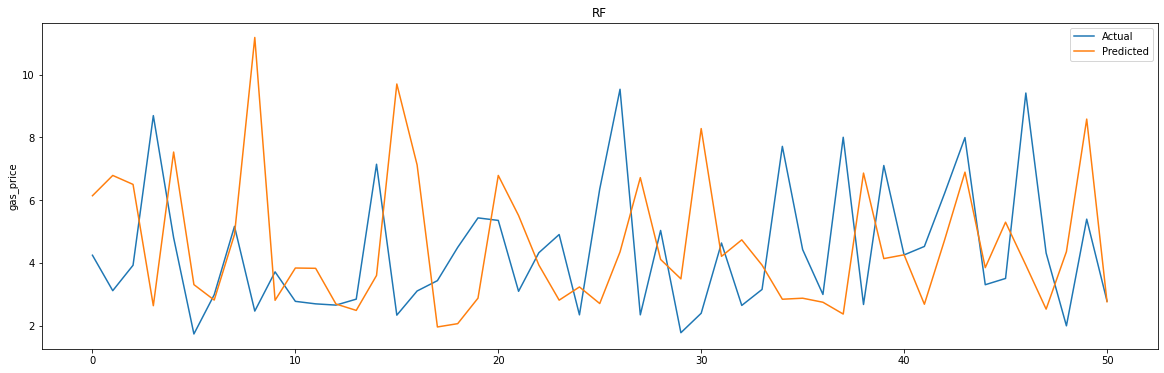

In [162]:
plt.figure(figsize=(20,6))
plt.plot(rf_predictions['Actual'])
plt.plot(rf_predictions['Predicted'])
plt.ylabel('gas_price')
#plt.xlabel('Predicted')
plt.legend(['Actual', 'Predicted'], loc='best')
plt.title('RF')
plt.show()

__Gradient Boosting Machine__

In [26]:
from sklearn.ensemble import GradientBoostingRegressor


In [50]:
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred=gb.predict(X_test)
print('The RMSE score for the GBR model is', np.sqrt(mean_squared_error(y_test, gb_pred)))

The RMSE score for the GBR model is 0.8540470649589342


In [30]:
  for i in range(20):
    outer_cv=KFold(n_splits=10, shuffle= True)
    scores = cross_val_score(gb, X, y, scoring='neg_root_mean_squared_error', cv=outer_cv)
    print(np.mean(scores))

-0.8437703952282559
-0.84121231272826
-0.7859000830346204
-0.7790010773929379
-0.7755438628686597
-0.8160477474671801
-0.777575532233348
-0.8697214061308195
-0.8242851839855525
-0.8620721123751138
-0.8181425789314071
-0.8155905390959252
-0.872190197963287
-0.9178881380014416
-0.7816743099520338
-0.8179416108368794
-0.7227081861900496
-0.8864756329737908
-0.8068022136024947
-0.7902468829318188


In [38]:
gbr_predictions=get_preds(y_test, gb_pred)
gbr_predictions


,Actual,Predicted
0,4.24,4.008750
1,3.11,3.938106
2,3.92,3.753718
3,8.69,7.842604
4,4.80,3.982835
5,1.73,2.118093
6,2.98,2.950029
7,5.16,3.553646
8,2.46,3.096789
9,3.71,3.837725


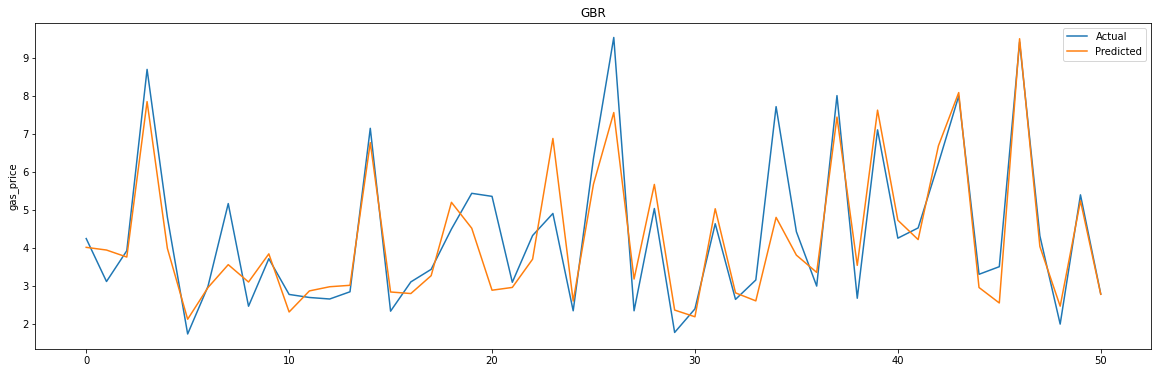

In [163]:
plt.figure(figsize=(20,6))
plt.plot(gbr_predictions['Actual'])
plt.plot(gbr_predictions['Predicted'])
plt.ylabel('gas_price')
plt.legend(['Actual', 'Predicted'], loc='best')
plt.title('GBR')
plt.show()

__Artificial Neural Network__

In [103]:
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor

In [105]:
ann=tf.keras.models.Sequential()


We use a 3 hidden layer neural network with 256 units alongside the rectified linear activation function

In [114]:
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))

In [115]:
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [116]:
ann.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [145]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)


Model validation for the Artificial neural network is necessary to check for overfitting which the ANN is known to be very susceptible to.

In [153]:
history=ann.fit(X_train1, y_train1, batch_size=32, epochs=300, validation_data=(X_train1, y_train1), callbacks=[callback])

Epoch 1/300
7/7 [==============================] - 0s 18ms/step - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0208 - val_mean_squared_error: 0.0208
Epoch 2/300
7/7 [==============================] - 0s 13ms/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 3/300
7/7 [==============================] - 0s 13ms/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 4/300
7/7 [==============================] - 0s 13ms/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 5/300
7/7 [==============================] - 0s 11ms/step - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 6/300
7/7 [==============================] - 0s 13ms/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 7/300
7/7 [=======================

In [154]:
ann_preds=ann.predict(X_test1)

In [155]:
mse = tf.keras.losses.MeanSquaredError()
ann_mse=mse(y_test1, ann_preds).numpy()
ann_mse

0.0790542

In [156]:
print('The RMSE score for the ANN model is', np.sqrt(ann_mse))


The RMSE score for the ANN model is 0.28116578


A plot showing the drop in the loss between the training and validation sets through the epochs

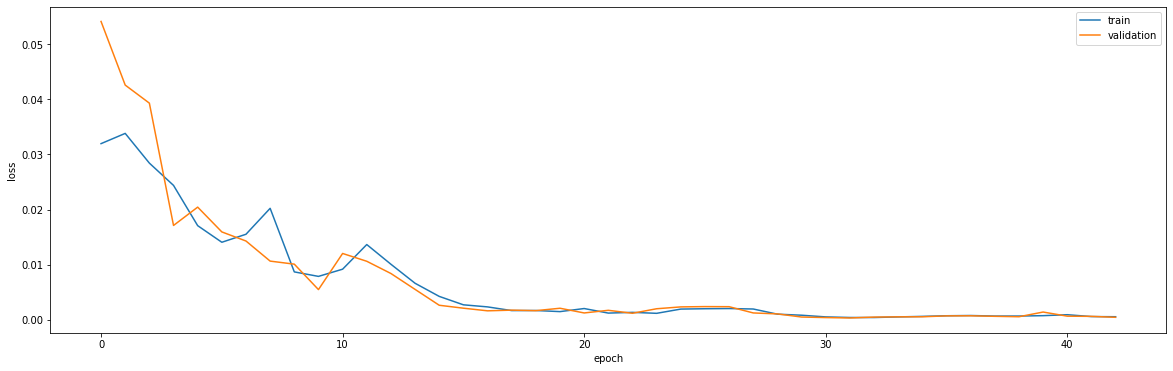

In [94]:
plt.figure(figsize=(20,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

In [157]:
y_new= sc_y.inverse_transform(y_test1)
ann_inverse = sc_y.inverse_transform(ann_preds)
ann_predictions=get_preds(y_new, ann_inverse)
ann_predictions

,Actual,Predicted
0,4.24,3.613899
1,3.11,3.147012
2,3.92,3.830904
3,8.69,9.160196
4,4.80,4.540574
5,1.73,2.004617
6,2.98,2.986351
7,5.16,4.970586
8,2.46,2.585646
9,3.71,3.663667


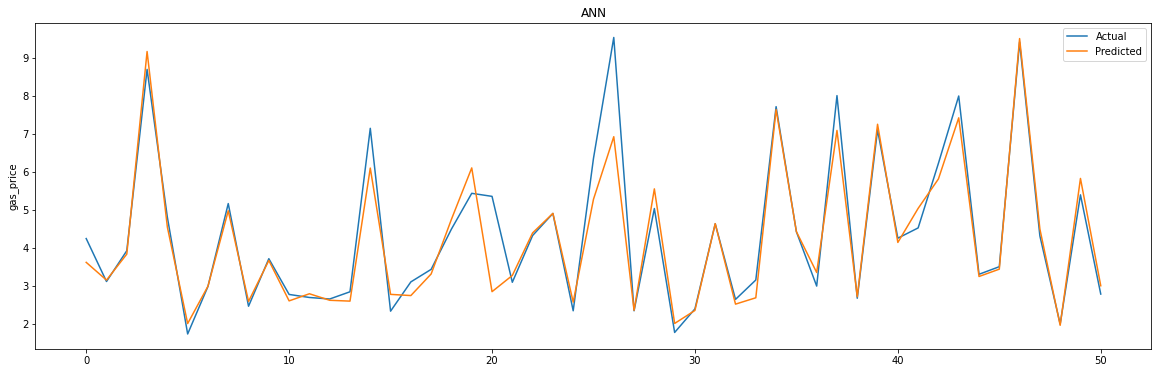

In [164]:
plt.figure(figsize=(20,6))
plt.plot(ann_predictions['Actual'])
plt.plot(ann_predictions['Predicted'])
plt.ylabel('gas_price')
plt.legend(['Actual', 'Predicted'], loc='best')
plt.title('ANN')
plt.show()